# Haar Cascade Object Detection OpenCV

In [2]:
# https://www.goeduhub.com/11046/tutorial-training-computer-library-artificial-intelligence

import numpy as np
import cv2  # pip install opencv-python

%matplotlib inline

In [14]:
cv2.__version__

'4.5.2'

### show image using OpenCV

In [8]:
# picture from
# https://4.bp.blogspot.com/_Dwex9AQ8IuA/S2sVUa1Jg2I/AAAAAAAARUs/PW_z8rLDNb0/s1600-h/eat-the-rainbow-fruits-veggies-3.jpg

path = '../Unknown/test_folder/eat-the-rainbow-fruits-veggies-3.jpg'
# or
# path = r'C:\Users\Unknown\eat-the-rainbow-fruits-veggies-3.jpg'
  
# read the image path
img = cv2.imread(path)

# open new window to show picture, with title 'Image'
cv2.imshow('Image',img)

# waiting any key stroke toclose the window
cv2.waitKey(0)
cv2.destroyAllWindows()



### face detection on image using Harr Cascade

In [9]:
# image from:
# https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F20%2F2019%2F09%2Ffriends-1-2000.jpg
path = '../Unknown/test_folder/friends_image.jpg'

# xml from:
# https://github.com/opencv/opencv/tree/master/data/haarcascades
# https://github.com/een450/MasterProject

faceCascada = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

if faceCascada.empty():
        raise IOError('Unable to haarcascade_frontalface_alt2.xml file')


In [10]:
img=cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
faces = faceCascada.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=5,minSize=(20,20))

# the output here is an array of detections; the corners of each detection box
print(faces)

[[ 367  581  198  198]
 [1050  749  200  200]
 [ 140  796  172  172]
 [ 569  379  167  167]
 [ 885  831  183  183]
 [ 768  460  192  192]]


In [11]:
# loop over the detected faces, mark the image where each face is found

for (x,y,w,h) in faces:

    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)  # draw blue rectangle around the face. CV2 is BGR 


In [15]:
import os
directory='test_folder'
if not os.path.exists(directory):
    os.makedirs(directory)
cv2.imwrite(directory+ '/'+ 'roi.jpg', img)  # Save the image


cv2.imshow('roi.jpg',img)
# waiting any key stroke toclose the window
cv2.waitKey(0)
cv2.destroyAllWindows()

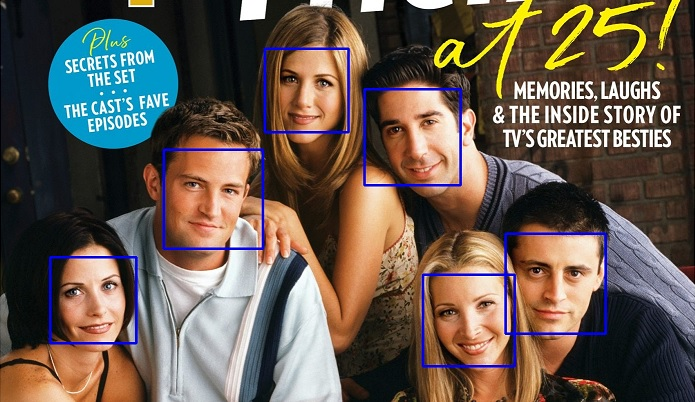

In [9]:
from IPython.display import Image
Image(filename='../Unknown/test_folder/result1.jpg') 

### Save individual faces to the folder

In [33]:
import os
count=0
for (x,y,w,h) in faces:
    count=count+1
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    roi=img[y:y+h, x:x+w]

    s='roi'+str(count)+'.jpg'

    directory='test_folder'
    if not os.path.exists(directory):
        os.makedirs(directory)
    print(s)
    cv2.imwrite(directory+'/'+s,roi)

roi1.jpg
roi2.jpg
roi3.jpg
roi4.jpg
roi5.jpg
roi6.jpg


### play video file

In [3]:
# Video capture from:
# https://www.youtube.com/watch?v=LOTlx_UK08I

path = '../Unknown/test_folder/einstein.mp4'

In [3]:
# from first web camera
# cap = cv2.VideoCapture(0)
# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture(path)

# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video  file")
   
# Read until video is completed
while(cap.isOpened()):
    
    # Capture frame-by-frame
    ret, frame=cap.read()
    if ret == True:
   
        # Display the resulting frame

        cv2.imshow('frame_display',frame),
        if cv2.waitKey(1) & 0xFF==ord('q'):
            break
    # Break the loop
    else: 
        break

# When everything done, release 
# the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

### Face, eyes, Nose Detection using Harr Cascade

In [10]:
path = '../Unknown/test_folder/einstein.mp4'
face_detect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
eye_detect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
nose_detect = cv2.CascadeClassifier('haarcascade_mcs_nose.xml')

if face_detect.empty():
        raise IOError('Unable to haarcascade_frontalface_alt2.xml file')
if eye_detect.empty():
        raise IOError('Unable to haarcascade_eye.xml file')
if nose_detect.empty():
        raise IOError('Unable to haarcascade_mcs_nose.xml file')

In [11]:
# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture(path)

# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video  file")

In [12]:
while True:
    ret, capturing = cap.read()
    resize_frame = cv2.resize(capturing, None, fx=0.5, fy=0.5 ,interpolation= cv2.INTER_AREA)
    gray = cv2.cvtColor(resize_frame , cv2.COLOR_BGR2GRAY)
    face_detection= face_detect.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in face_detection:
        cv2.rectangle(resize_frame , (x,y), (x+w, y+h),(255,0,0),3)
    gray_roi= gray[y:y+h, x:x+w]
    color_roi =resize_frame[y:y+h, x:x+w]
            
    eye_detection= eye_detect.detectMultiScale(gray_roi)
    for (eye_x, eye_y, eye_w, eye_h) in eye_detection:
        cv2.rectangle(color_roi,(eye_x, eye_y),(eye_x + eye_w, eye_y + eye_h),(0,255,0),2)
    
    nose_detection= nose_detect.detectMultiScale(gray_roi,1.3,5)
    for (nose_x, nose_y, nose_w, nose_h) in nose_detection:
        cv2.rectangle(color_roi,(nose_x,nose_y),(nose_x + nose_w, nose_y + nose_h),(0,0,255),2)
        
    cv2.imshow("Video Detection", resize_frame )
    
    # check if the user pressed ESC key
    c= cv2.waitKey(1) & 0xff
    if c==27:
        break
        
# When everything done, release 
# the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

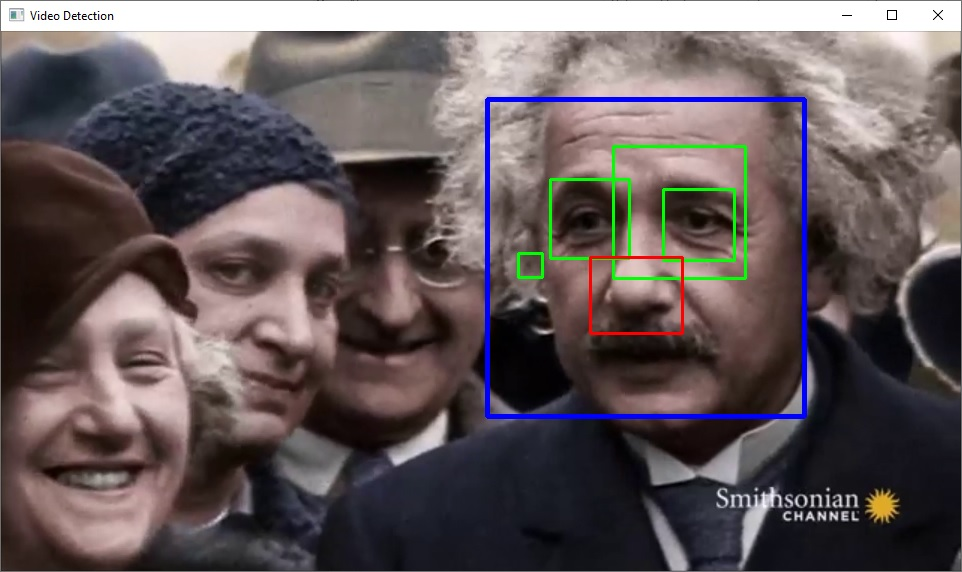

In [13]:
Image(filename='../Unknown/test_folder/result2.jpg') 

In [3]:
# Another version without resize the frame but slow
# https://pythonprogramming.net/haar-cascade-face-eye-detection-python-opencv-tutorial/

import numpy as np
import cv2

path = '../Unknown/test_folder/einstein.mp4'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


cap = cv2.VideoCapture(path)

# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video  file")
    
while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

### Pedestrian Detection

In [14]:
# Video from:
# https://www.videvo.net/video/pedestrians-on-a-walkway/8175/

import cv2
import numpy as np
import time

In [15]:
pedestrian_detect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')
if pedestrian_detect.empty():
        raise IOError('Unable to haarcascade_fullbody.xml file')
        
path = '../Unknown/test_folder/180301_06_B_CityRoam_01.mp4'
capture = cv2.VideoCapture(path)

In [16]:
while capture.isOpened():
    time.sleep(0.05)
    ret, frame = capture.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5 ,interpolation= cv2.INTER_AREA)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    pedestrian_detected = pedestrian_detect.detectMultiScale(gray, 1.2, 3)

    for (x,y,w,h) in pedestrian_detected:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        cv2.imshow('Pedestrian Detection',frame)
        
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break

capture.release()
cv2.destroyAllWindows()

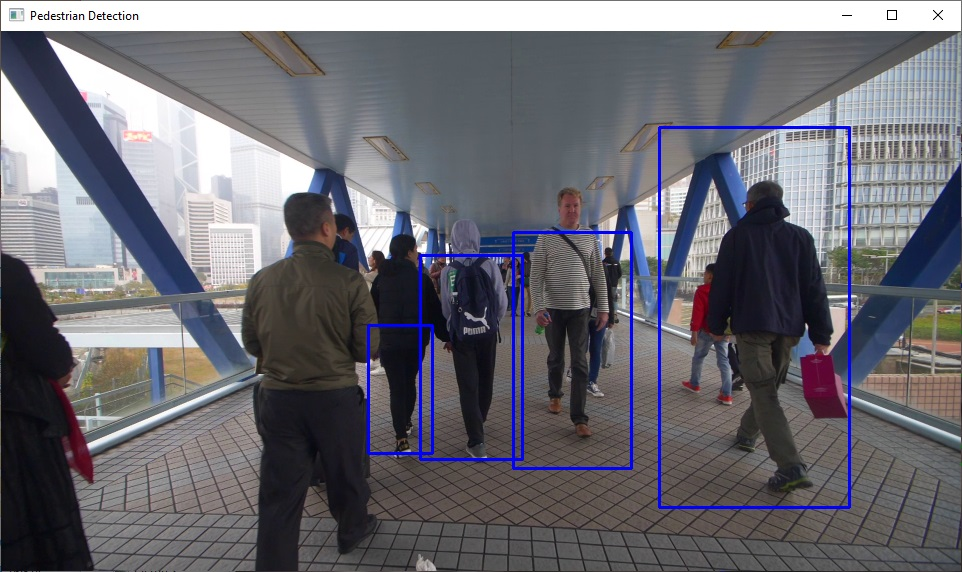

In [17]:
Image(filename='../Unknown/test_folder/result3.jpg') 

### Cars Detection

In [1]:
import cv2
import numpy as np
import time

In [18]:
# Video and XML from: 
# https://github.com/Kalebu/Real-time-Vehicle-Dection-Python

cars_detect = cv2.CascadeClassifier('haarcascade_car.xml')
if cars_detect.empty():
        raise IOError('Unable to haarcascade_car.xml file')
        
path = '../Unknown/test_folder/cars.mp4'
capture = cv2.VideoCapture(path)

In [19]:
while capture.isOpened():
    time.sleep(0.05)
    ret, frame = capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cars_detected = cars_detect.detectMultiScale(gray, 1.4, 2)

    for (x,y,w,h) in cars_detected:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        cv2.imshow('cars Detection',frame)
        
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break

capture.release()
cv2.destroyAllWindows()

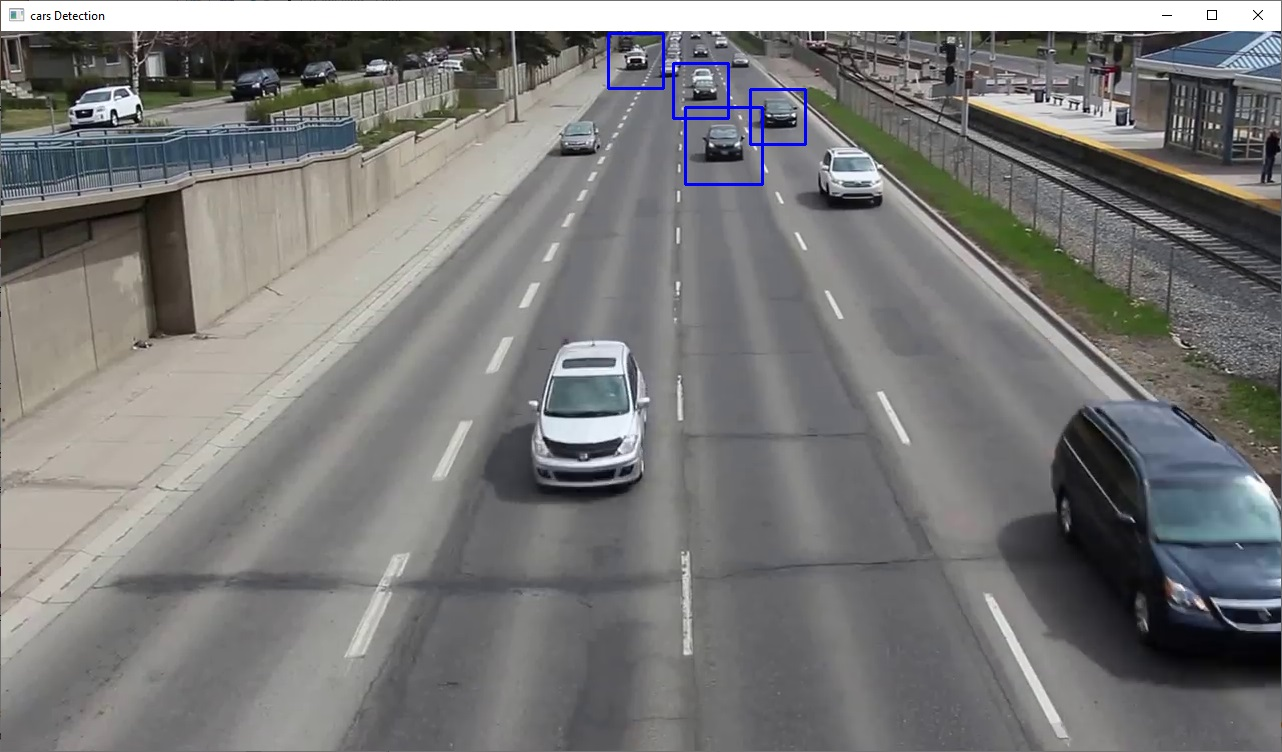

In [20]:
Image(filename='../Unknown/test_folder/result4.jpg') 

### Social Distancing using face detection

In [21]:
import cv2
import numpy as np
import math

In [22]:
# image from:
# https://www.thebeaverton.com/wp-content/uploads/2018/04/Everyone-2.jpeg

face_detect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
if face_detect.empty():
        raise IOError('Unable to haarcascade_fullbody.xml file')
        
path = '../Unknown/test_folder/Everyone-2.jpeg'
frame = cv2.imread(path)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
face = face_detect.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(20, 20))

In [23]:
l=[]

lf=[]

i=1\

for (x,y,w,h) in face:

    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)

    s=str(i)    # Face No.

    cv2.putText(frame, s, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0),2) 

    # Putting text in the detected faces

    i+=1

    l=[]

    l.append(x)

    l.append(y)

    lf.append(l)

    print(l)

print(lf)

[259, 24]
[492, 30]
[50, 40]
[389, 55]
[[259, 24], [492, 30], [50, 40], [389, 55]]


In [24]:
close_person=""
for i in range(len(lf)):

    for j in range(i+1,len(lf)):
        d=math.sqrt( ((lf[j][1]-lf[i][1])**2)+((lf[j][0]-lf[i][0])**2) )

        print("P",i+1,"- P",j+1,"=",d)

        if d<150:

            close_person+="Person "+str(i+1)+" and Person "+str(j+1)+" ; "

            cv2.line(frame, (lf[i][0],lf[i][1]), (lf[j][0],lf[j][1]),(0, 0, 255),2)

close_person+=" are not following social distancing "

print(close_person)

P 1 - P 2 = 233.0772404161333
P 1 - P 3 = 209.6115454835444
P 1 - P 4 = 133.64505228402584
P 2 - P 3 = 442.11310769982833
P 2 - P 4 = 105.99056561788883
P 3 - P 4 = 339.3316961322653
Person 1 and Person 4 ; Person 2 and Person 4 ;  are not following social distancing 


In [25]:
import os
directory='test_folder'
if not os.path.exists(directory):
    os.makedirs(directory)
cv2.imwrite(directory+ '/'+ 'soical.jpg', frame)  # Save the image

cv2.imshow('Image',frame)

# waiting any key stroke toclose the window
cv2.waitKey(0)
cv2.destroyAllWindows()

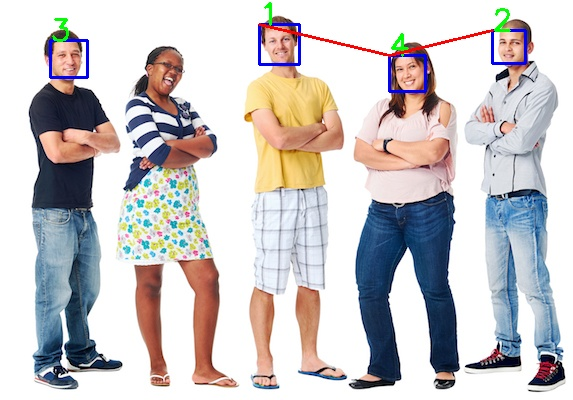

In [26]:
Image(filename='../Unknown/test_folder/soical.jpg') 